## IMPORT THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import flask
import pickle

## READ THE DATASET

In [4]:
df = pd.read_csv("/content/indian_liver_patient.csv")

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## VISUALIZATION

## UNI VARIATE ANALYSIS

In [6]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


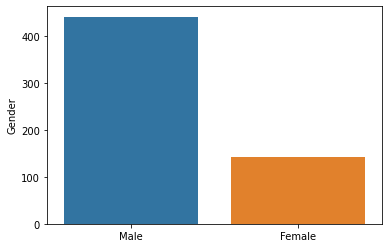

In [7]:
sns.barplot (df.Gender.value_counts().index , df.Gender.value_counts())

([<matplotlib.patches.Wedge at 0x7fe1b1cb7bd0>,
 [Text(-0.9376253603923962, 0.9004769200534956, 'M'),
  Text(0.7933752692783315, -0.7619420464166125, 'F')],
 [Text(-0.577000221779936, 0.5541396431098434, '75.6%'),
  Text(0.43275014687908986, -0.4156047525908795, '24.4%')])

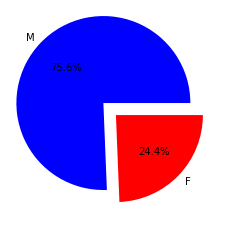

In [8]:
plt.pie(df.Gender.value_counts(),[0.2,0],labels=['M','F'],autopct="%1.1f%%",colors=['blue','red'])

## BI VARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


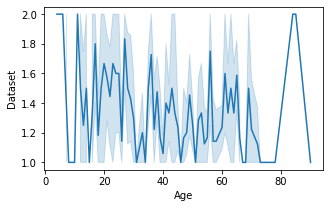

In [9]:
plt.figure(figsize=(5,3))
sns.lineplot(df.Age,df.Dataset)

## MULTI-VARIATE ANALYSIS

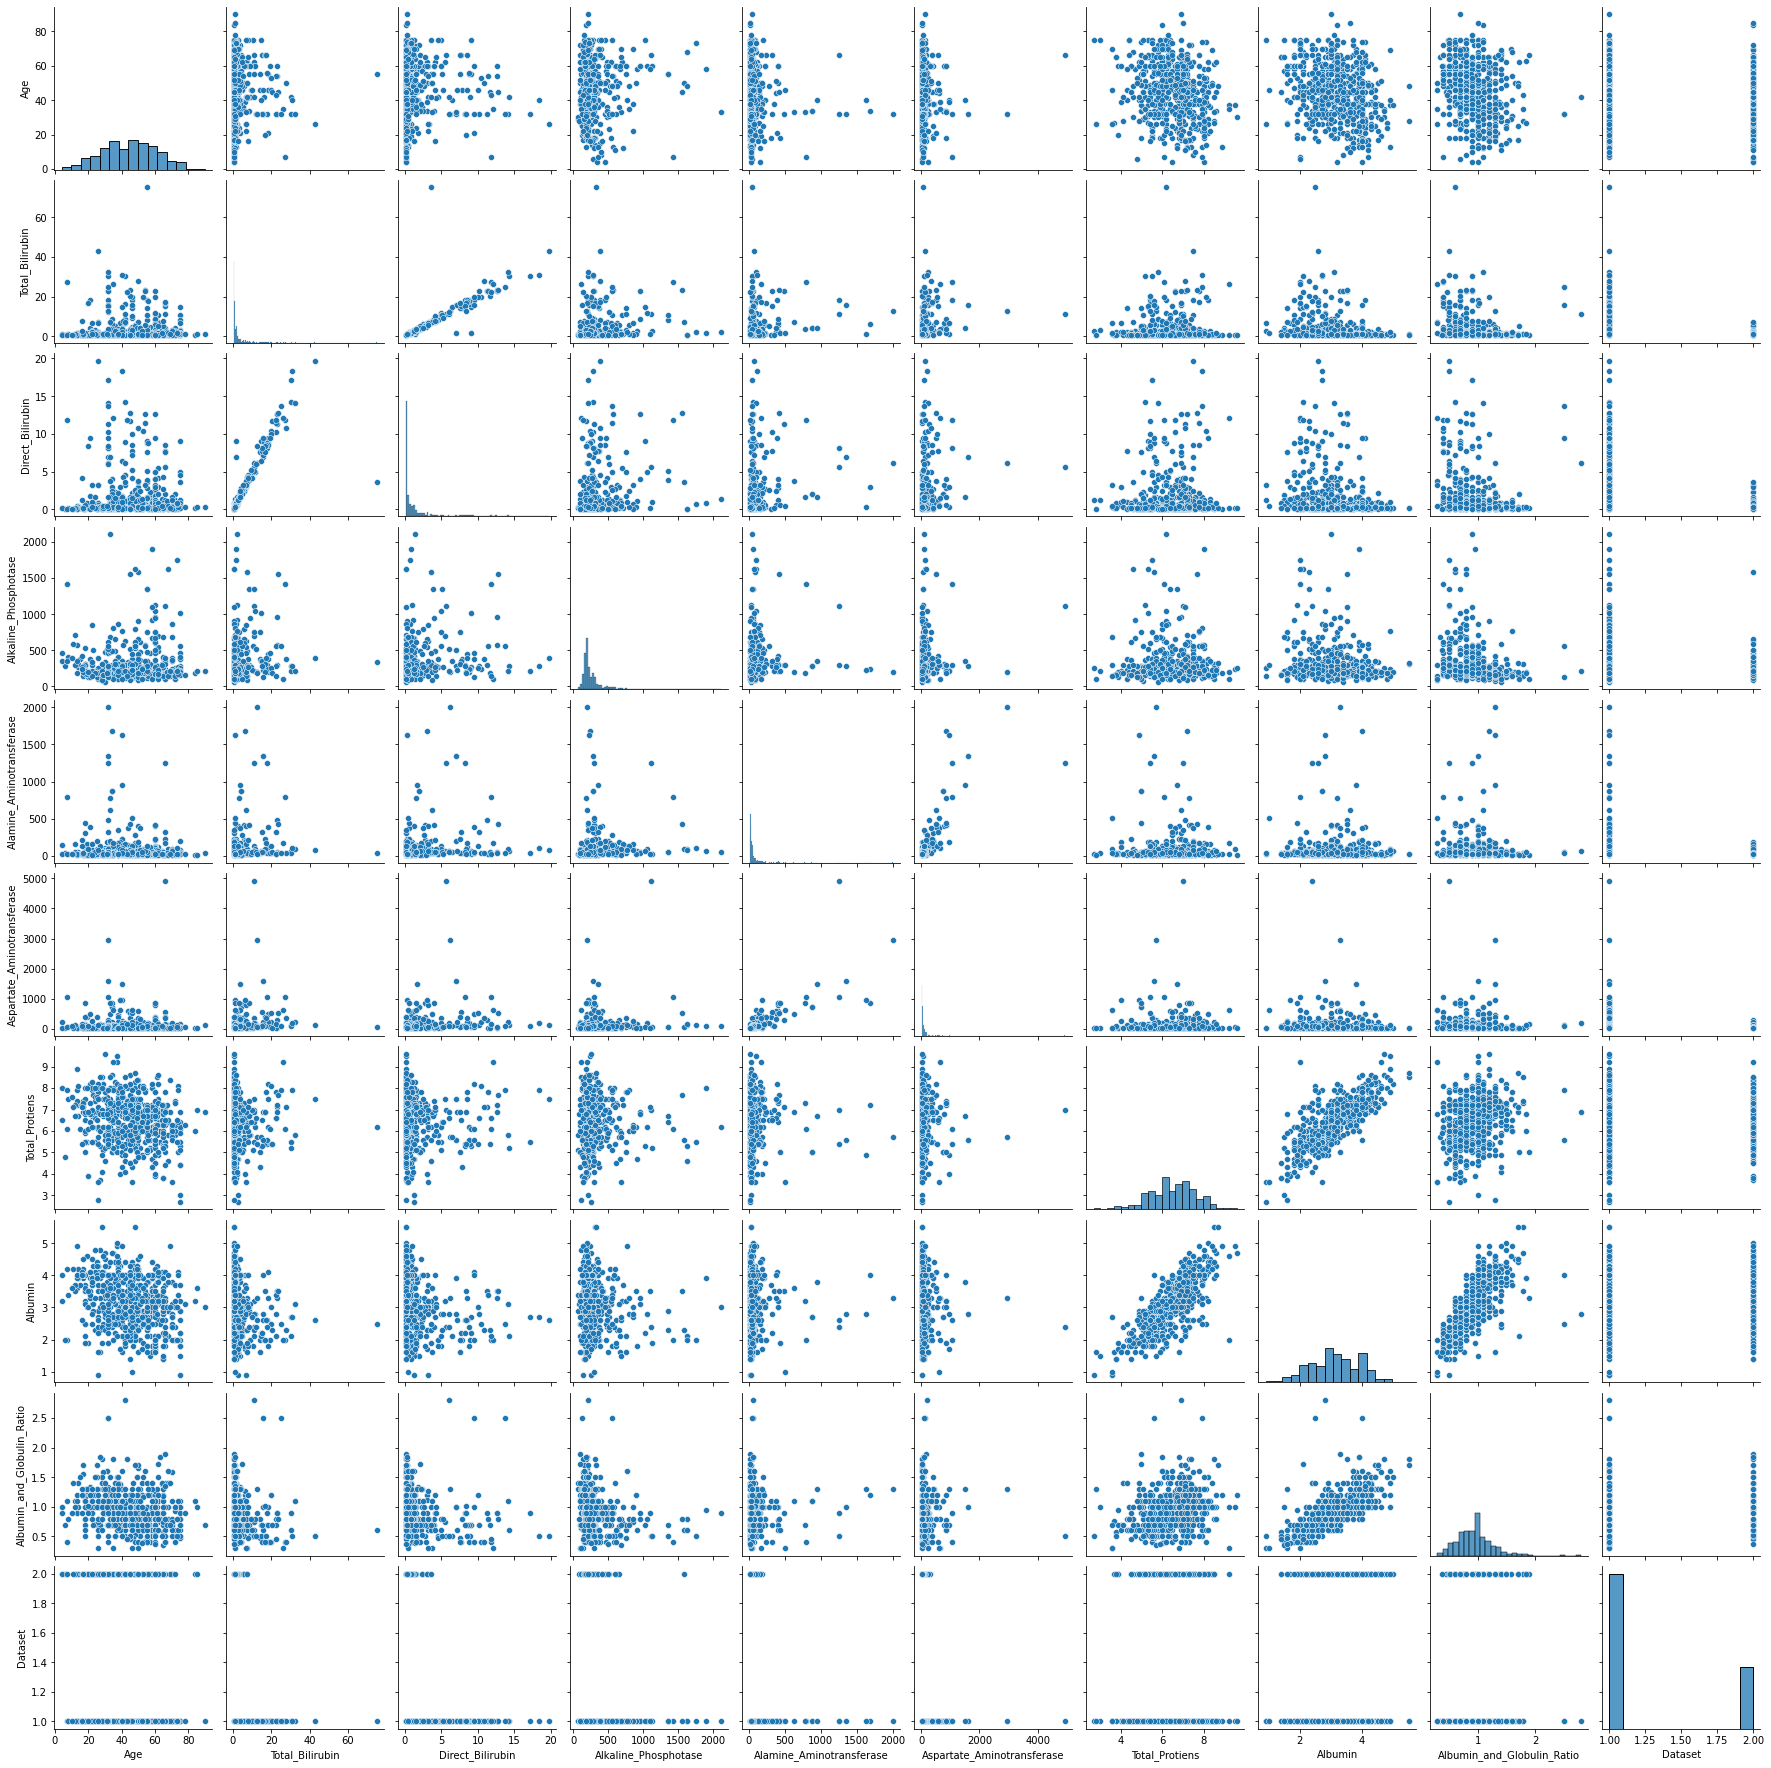

In [10]:
sns.pairplot(df)

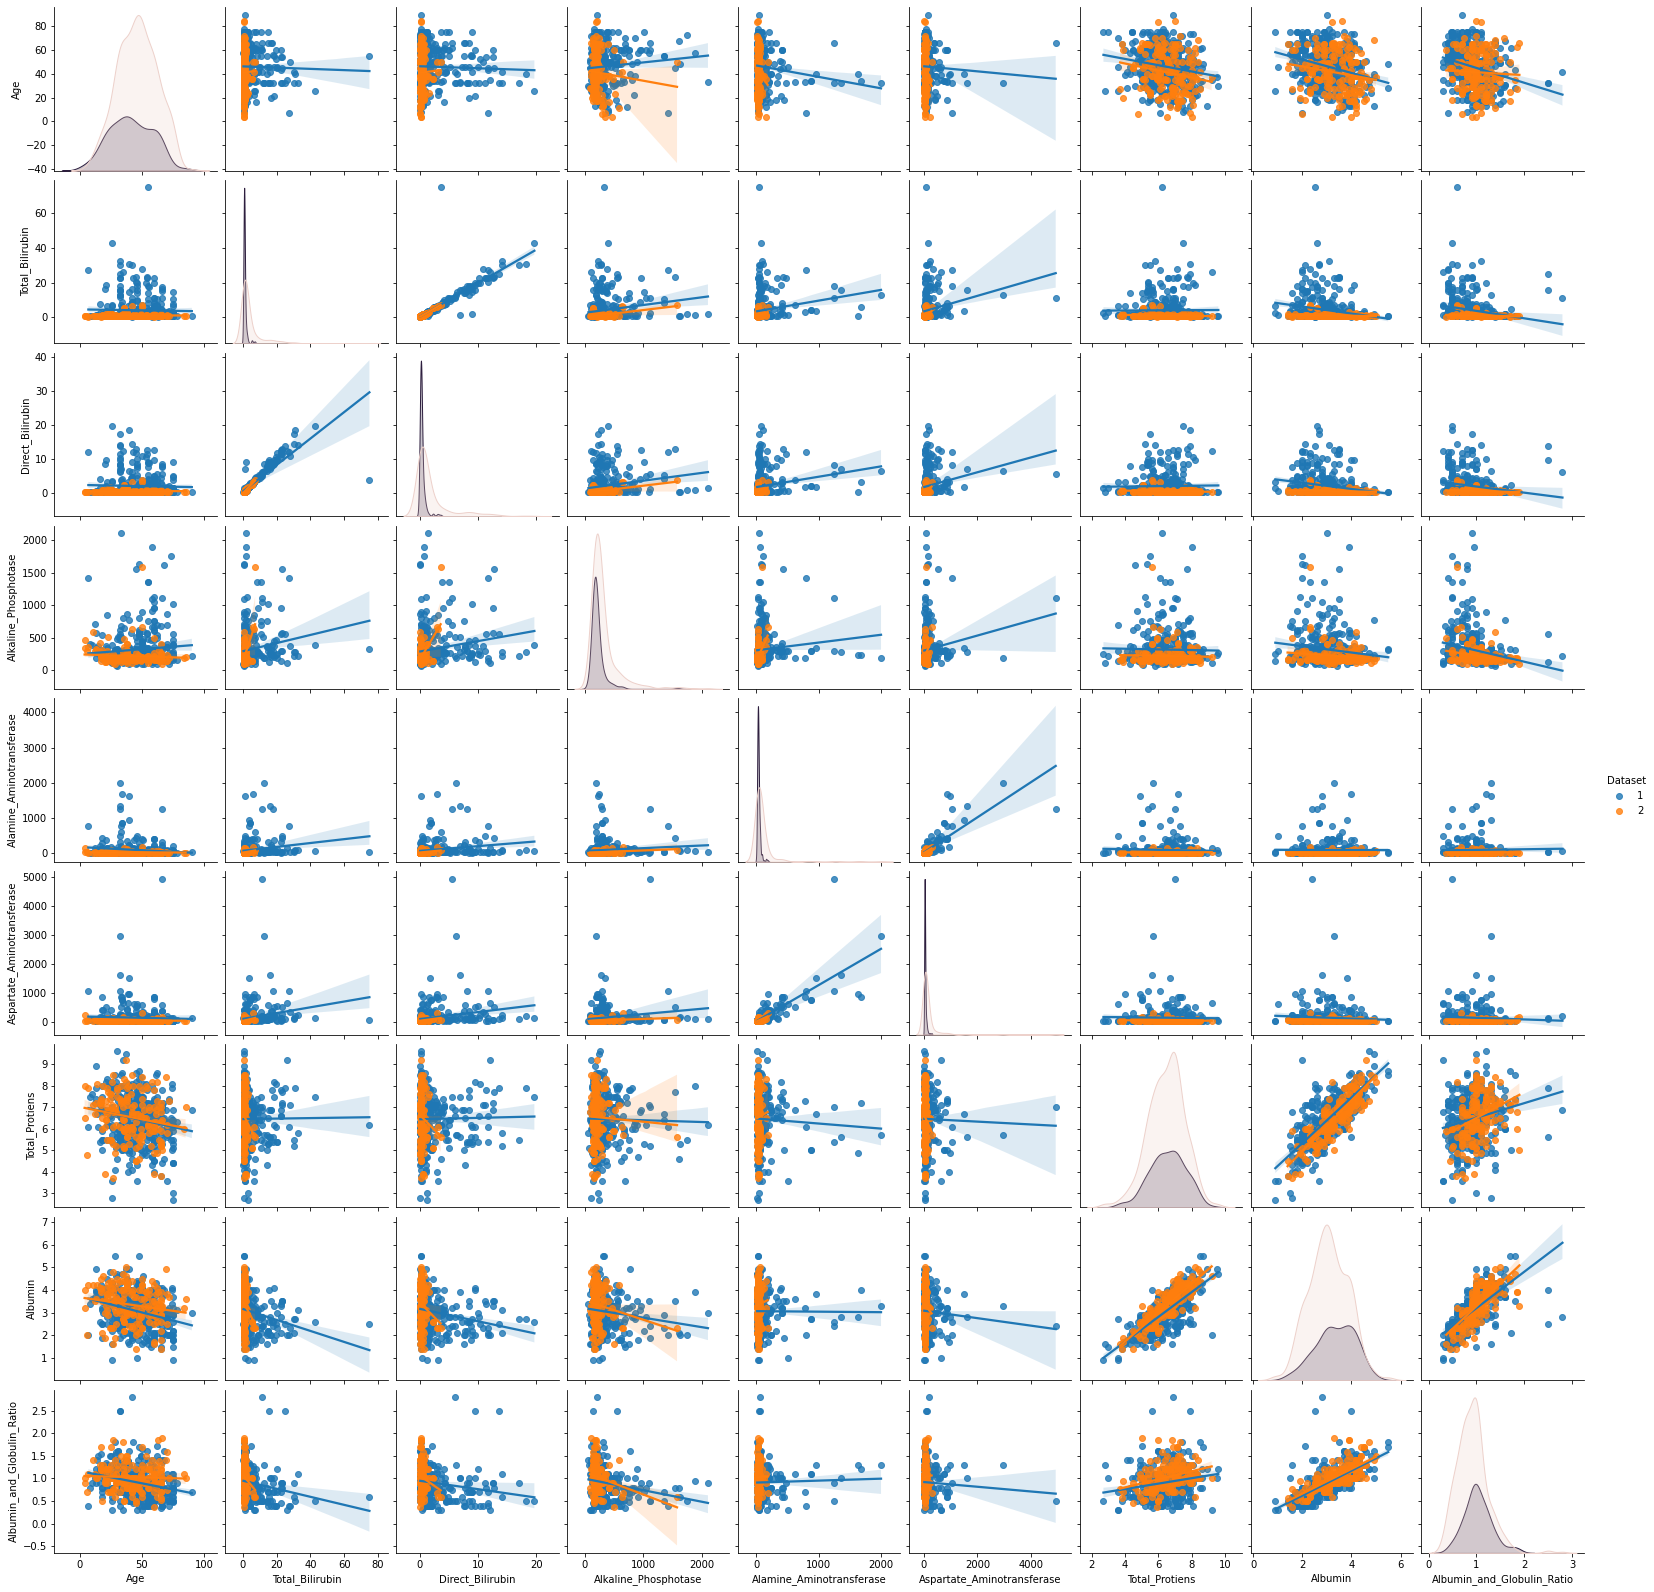

In [11]:
sns.pairplot(df,hue='Dataset',kind ='reg')

## CORRELATION BETWEEN NUMERICAL COLUMNS THROUGH HEAT MAP

In [12]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


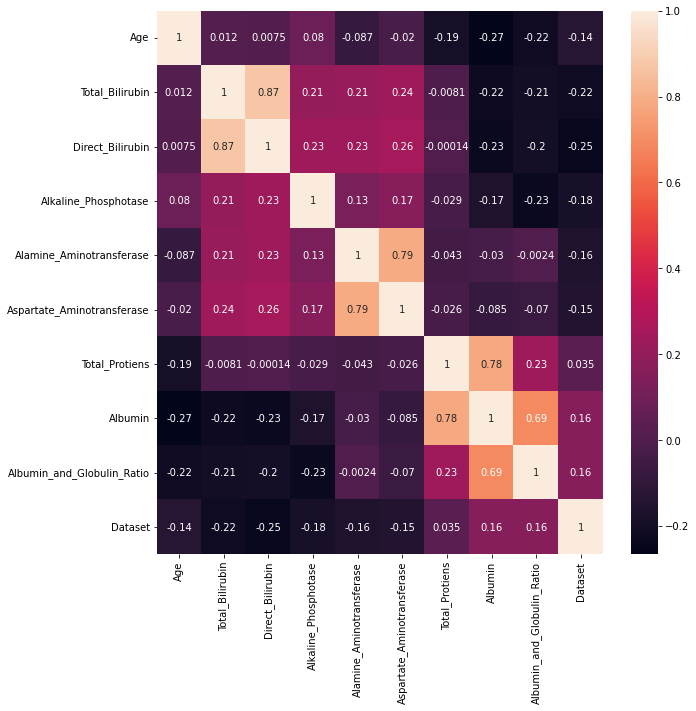

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## CHECKING NULL VALUES AND REPLACING THEM 

In [14]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [15]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [16]:
df['Albumin_and_Globulin_Ratio'].fillna((df['Albumin_and_Globulin_Ratio'].mean()), inplace=True)

In [17]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

## SPLITTING THE DATASET INTO X= INDEPENDENT VARIABLES AND Y = DEPENDENT VARIABLES

In [18]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

## PERFORM ENCODING

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
X.Gender=le.fit_transform(X.Gender)

In [21]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


## SCALING

In [22]:
from sklearn.preprocessing import scale

In [23]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


## SPLIT THE DATA INTO TRAINING AND TESTING

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 47)

## MODEL BUILDING

In [25]:
from sklearn.ensemble import RandomForestClassifier 

In [26]:
RFmodel = RandomForestClassifier()

In [27]:
RFmodel.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_predict = RFmodel.predict(x_test)
y_predict

array([1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [29]:
y_predict_train = RFmodel.predict(x_train)
y_predict

array([1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

## EVALUATION MODEL

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
print('Testing accuracy = ', accuracy_score(y_test,y_predict))
print("Training accuracy= ",accuracy_score(y_train,y_predict_train))

Testing accuracy =  0.7191780821917808
Training accuracy=  1.0


## CONFUSION MATRIX

In [32]:
pd.crosstab(y_test,y_predict)

col_0,1,2
Dataset,,
1,85,13
2,28,20


In [33]:
pd.crosstab(y_test,y_predict)

col_0,1,2
Dataset,,
1,85,13
2,28,20


## USER INPUT

In [34]:
Age = int(input())
Gender = input()
Total_Bilirubin = float(input())
Direct_Bilirubin	= float(input())
Alkaline_Phosphotase	= int(input())
Alamine_Aminotransferase	= int(input())
Aspartate_Aminotransferase	= int(input())
Total_Protiens	= float(input())
Albumin = float(input())
Albumin_and_Globulin_Ratio = float(input())

65
Female
0.7
0.1
187
16
18
6.8
3.3
0.90


In [35]:
data = [[Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio]]

In [36]:
data = pd.DataFrame(data)

In [37]:
data

,0,1,2,3,4,5,6,7,8,9
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9


In [38]:
data.columns =['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

In [39]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9


In [40]:
data['Gender']

0    Female
Name: Gender, dtype: object

## ENCODING

In [41]:
data.Gender=le.fit_transform(data.Gender)

In [42]:
P= RFmodel.predict(data)

In [43]:
P
# actual output is : 1

array([1])

In [45]:
import joblib
joblib.dump(RFmodel,'model.pkl')

['model.pkl']